# **빅데이터분석프로그래밍**
> 00주차 O반

# 파이썬 설치 확인
- PC: 아나콘다

In [35]:
import site
site.getsitepackages()

['c:\\Users\\109-1\\anaconda3',
 'c:\\Users\\109-1\\anaconda3\\Lib\\site-packages']

In [36]:
!pip install missingno

In [37]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
2.0.3
1.24.3
0.12.2
0.5.2


# 주피터노트북 matplotlib를 위한 한글 처리

In [38]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

In [39]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [40]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [41]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [42]:
import warnings
warnings.filterwarnings(action='ignore')

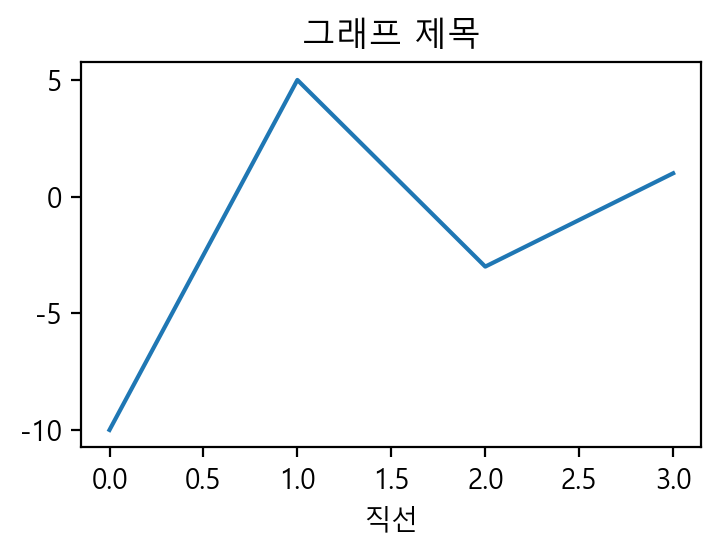

In [43]:
import matplotlib.pyplot as plt

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

---

# **셋째마당. 실전! 데이터 분석 프로젝트**
---
---


# 09 데이터 분석 프로젝트  - 한국인의 삶을 파악하라!

## 09-1 '한국복지패널 데이터' 분석 준비하기

### 데이터 분석 준비하기

#### 1. 데이터 준비하기

#### 2. 패키지 설치 및 로드하기

In [44]:
!pip show pyreadstat

Name: pyreadstat
Version: 1.2.7
Summary: Reads and Writes SAS, SPSS and Stata files into/from pandas data frames.
Home-page: https://github.com/Roche/pyreadstat
Author: Otto Fajardo
Author-email: pleasecontactviagithub@notvalid.com
License: Apache License Version 2.0
Location: C:\Users\109-1\anaconda3\Lib\site-packages
Requires: pandas
Required-by: 


In [45]:

 !pip install pyreadstat

#### 3. 데이터 불러오기

In [46]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


### 필요 파일
- Koweps_hpwc14_2019_beta2.sav
- Koweps_Codebook_2019.xlsx 

#### 아래 링크를 클릭해 한국복지패널데이터 파일을 다운로드하세요.

[Koweps_hpwc14_2019_beta2.sav](https://bit.ly/Koweps_hpwc14_2019_beta2)

In [151]:
# 데이터 불러오기
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

#### 4. 데이터 검토하기

In [152]:
welfare             # 앞부분, 뒷부분 출력

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [153]:
welfare.shape       # 행, 열 개수 출력

(14418, 830)

In [154]:
welfare.info()      # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [155]:
welfare.describe()  # 요약 통계량

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.00,14418.00,14418.00,1.44e+04,14418.0,121.00,1.15e+04,11513.00,11513.00,11513.00,...,2027.00,2027.00,2027.00,2027.00,2027.00,2659.00,3331.00,989.00,14418.00,715.00
mean,4672.11,3.12,1.00,4.67e+07,0.2,2.26,1.00e+00,1.00,4484.95,4484.95,...,3.21,3.74,3.51,4.10,3.23,4141.38,1389.44,3457.84,2.04,1183.29
std,2793.00,3.30,0.14,2.79e+07,0.4,1.68,9.06e-01,1.02,4063.46,4560.22,...,2.17,3.14,1.05,0.94,1.29,2583.76,1211.91,6619.52,32.97,2147.42
min,2.00,1.00,1.00,2.01e+04,0.0,1.00,2.00e-03,0.00,8.96,0.00,...,1.00,1.00,1.00,1.00,1.00,0.00,0.00,-47000.00,0.00,-10600.00
25%,2356.00,1.00,1.00,2.36e+07,0.0,1.00,3.42e-01,0.27,1533.02,1207.74,...,1.00,2.00,3.00,4.00,2.00,2448.00,391.50,1000.00,0.00,206.00
50%,4535.00,1.00,1.00,4.54e+07,0.0,2.00,7.26e-01,0.70,3257.44,3157.61,...,3.00,3.00,4.00,4.00,3.00,3540.00,1116.00,2498.00,0.00,530.00
75%,6616.00,7.00,1.00,6.62e+07,0.0,2.00,1.37e+00,1.39,6126.76,6234.29,...,5.00,5.00,4.00,5.00,4.00,5378.50,2040.00,4687.00,0.00,1295.00
max,9800.00,14.00,9.00,9.80e+07,1.0,7.00,4.73e+00,5.79,21200.39,25968.05,...,9.00,99.00,9.00,9.00,9.00,22700.00,11500.00,170000.00,3000.00,22644.00


#### 5. 변수명 바꾸기

In [156]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교
                                    'p1402_8aq1' : 'income',         #  월급
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

## 09-2 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

### 성별 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [157]:
welfare[('sex','birth','income')].head() # 변수 타입 출력

KeyError: ('sex', 'birth', 'income')

In [143]:
welfare['sex'].dtypes  # 변수 타입 출력

dtype('O')

In [146]:
welfare['sex'].value_counts()  # 빈도 구하기

sex
female    7913
male      6505
Name: count, dtype: int64

#### 2. 전처리하기

In [148]:
# 이상치 확인
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

In [149]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [150]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    14418
Name: count, dtype: int64

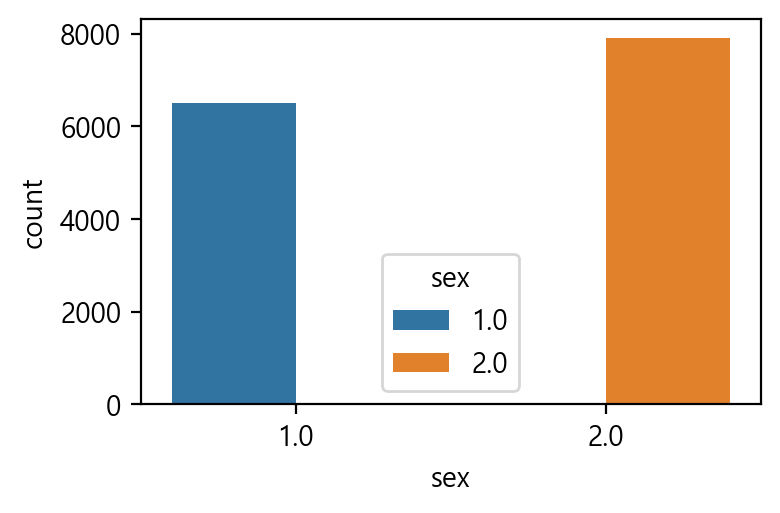

In [158]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'sex', hue = 'sex');

### 월급 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [59]:
welfare['income'].dtypes  # 변수 타입 출력

dtype('float64')

In [60]:
welfare['income'].describe()  # 요약 통계량 구하기

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

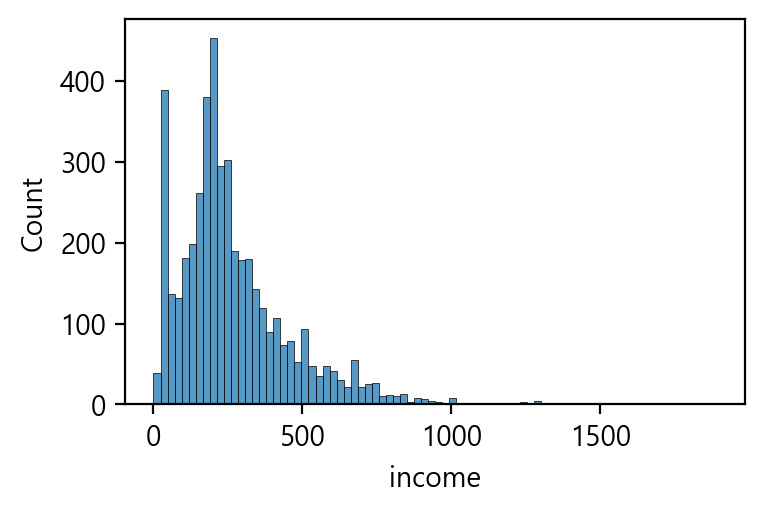

In [61]:
sns.histplot(data = welfare, x = 'income');  # 히스토그램 만들기

#### 2. 전처리하기


In [62]:
welfare['income'].describe()  # 이상치 확인

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

In [63]:
welfare['income'].isna().sum()  # 결측치 확인

9884

In [64]:
welfare[welfare['income'] == 9999]

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5


In [65]:
welfare[welfare['income'].isna()]

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
5,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.42,0.74,1885.45,3306.42,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.18,0.18,820.36,822.58,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14412,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,5181.0,0.0,NaN
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN


In [66]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

### 성별에 따른 월급 차이 분석하기

#### 1. 성별 월급 평균표 만들기

In [67]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


#### 2. 그래프 만들기

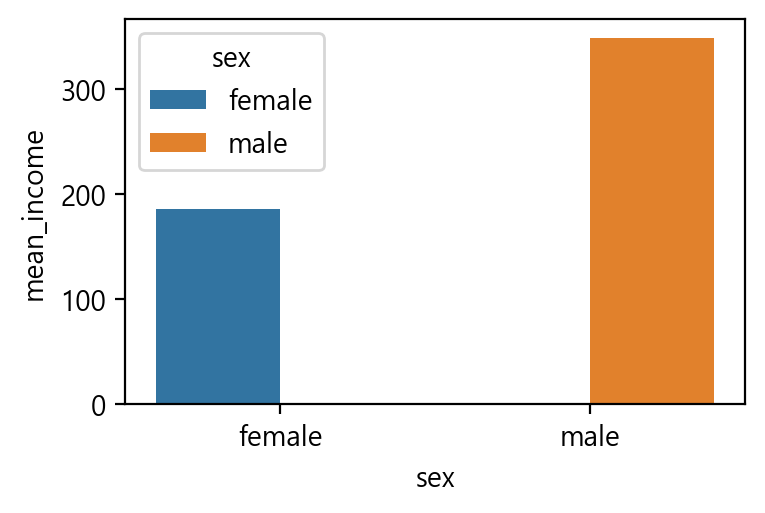

In [68]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income', hue = 'sex',);

## 09-3 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

### 나이 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [69]:
welfare['birth'].dtypes  # 변수 타입 출력

dtype('float64')

In [70]:
welfare['birth'].describe()  # 요약 통계량 구하기

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

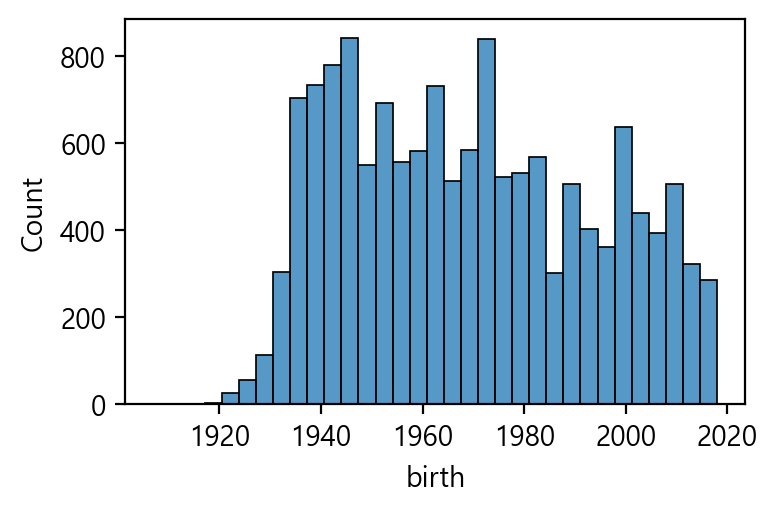

In [71]:
sns.histplot(data = welfare, x = 'birth');  # 히스토그램 만들기

#### 2. 전처리하기

In [72]:
welfare['birth'].describe()  # 이상치 확인

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

In [73]:
welfare['birth'].isna().sum()  # 결측치 확인

0

In [74]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

0

#### 3. 파생변수 만들기 - 나이

In [75]:
welfare = welfare.assign(age = 2024 - welfare['birth'])  # 나이 변수 만들기,기말고사 
welfare['age'].describe()                                    # 요약 통계량 구하기

count    14418.00
mean        54.72
std         24.40
min          6.00
25%         34.00
50%         56.00
75%         76.00
max        117.00
Name: age, dtype: float64

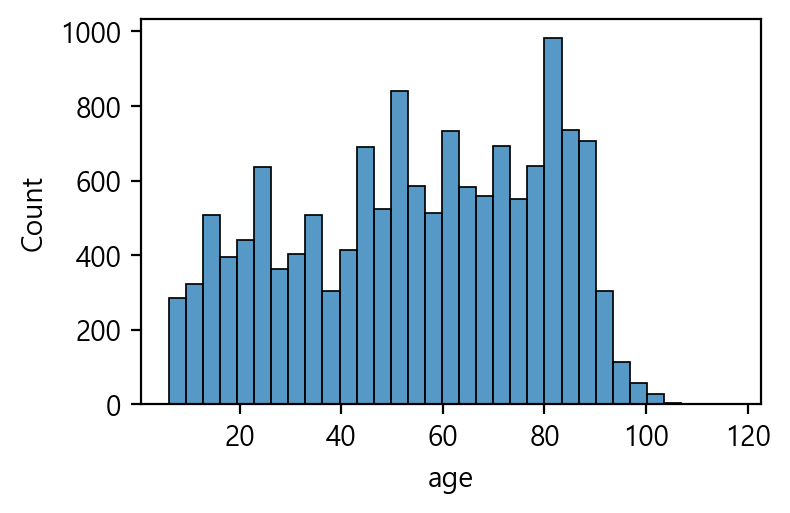

In [76]:
sns.histplot(data = welfare, x = 'age');  # 히스토그램 만들기

### 나이와 월급의 관계 분석하기

#### 1. 나이에 따른 월급 평균표 만들기

In [77]:
## 나이별 월급 평균표 만들기

# income 결측치 제거
# age별 분리
# income 평균 구하기
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
23.0,162.00
24.0,121.33
25.0,136.40
26.0,123.67
27.0,179.68


#### 2.  그래프 만들기

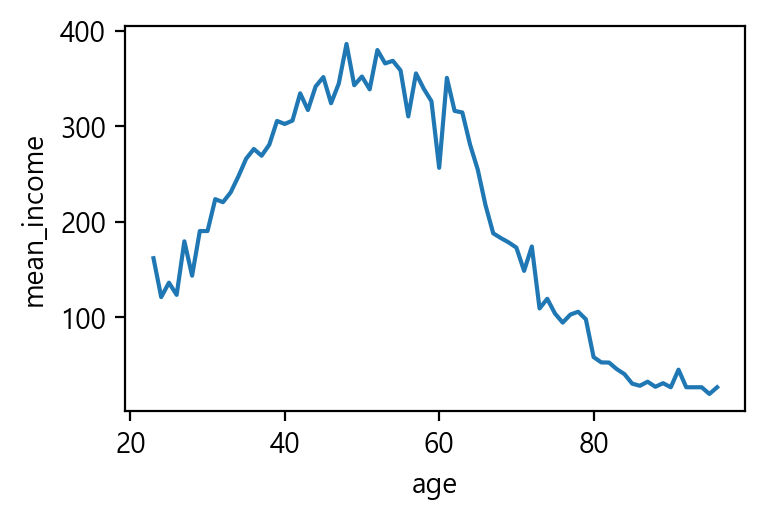

In [78]:
# 선 그래프 만들기
sns.lineplot(data = age_income, x = 'age', y = 'mean_income');

## 09-4 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

### 연령대 변수 검토 및 전처리하기

#### 파생변수 만들기 - 연령대


In [79]:
# 나이 변수 살펴보기
welfare['age'].head()

0    79.0
1    76.0
2    82.0
3    62.0
4    61.0
Name: age, dtype: float64

In [80]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] <  30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

ageg
old       6687
middle    4779
young     2952
Name: count, dtype: int64

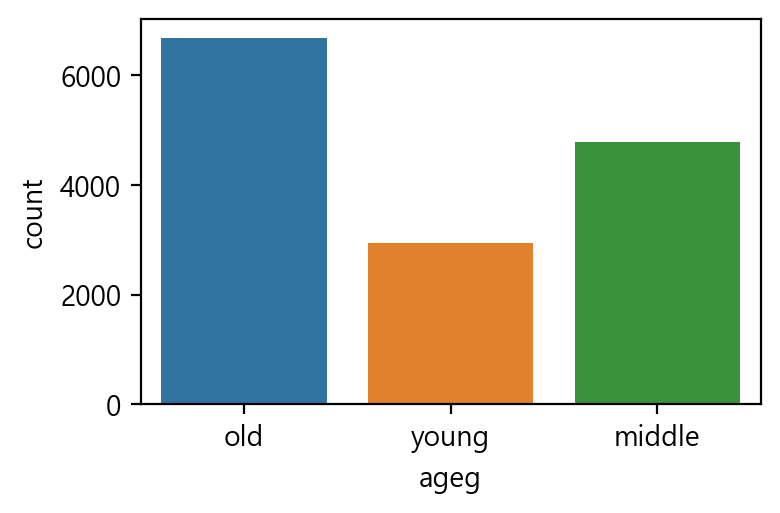

In [81]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg');

### 연령대에 따른 월급 차이 분석하기

#### 1. 연령대별 월급 평균표 만들기

In [82]:
## 연령대별 월급 평균표 만들기

# income 결측치 제거
# ageg별 분리
# income 평균 구하기
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,318.79
1,old,181.85
2,young,160.61


#### 2. 그래프 만들기

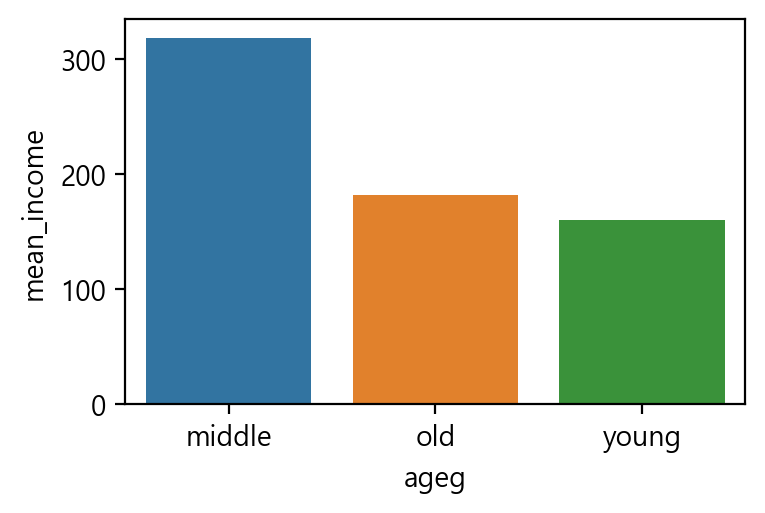

In [83]:
# 막대 그래프 만들기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income');

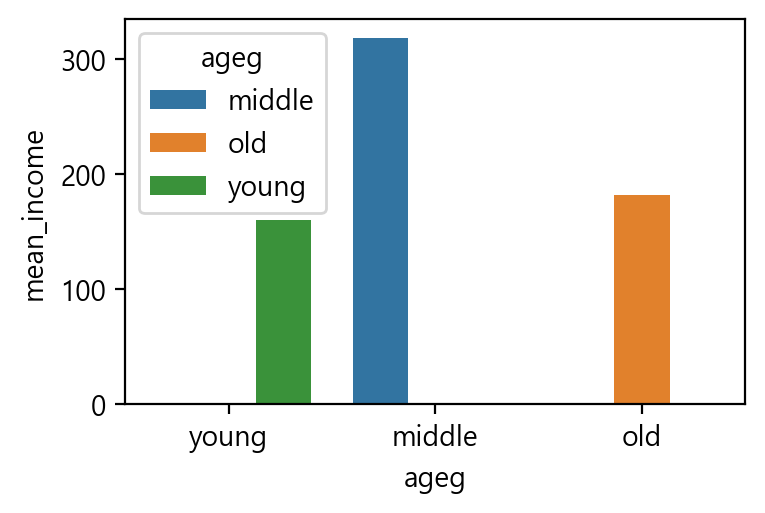

In [84]:
# 막대 정렬하기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income', hue='ageg',
            order = ['young', 'middle', 'old']);

## 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

### 연령대 및 성별 월급 차이 분석하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [85]:
## 연령대 및 성별 평균표 만들기

# income 결측치 제거
# ageg 및 sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,235.10
1,middle,male,388.25
2,old,female,109.73
3,old,male,268.32
4,young,female,160.04
5,young,male,162.29


#### 2. 그래프 만들기

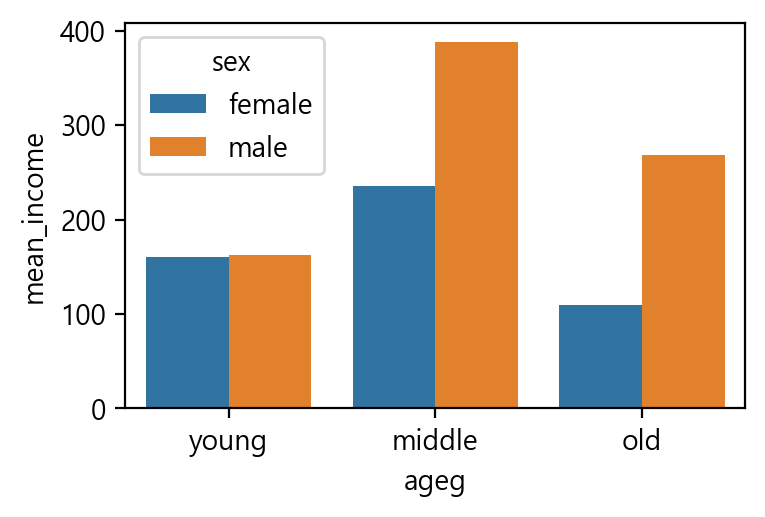

In [86]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old']);

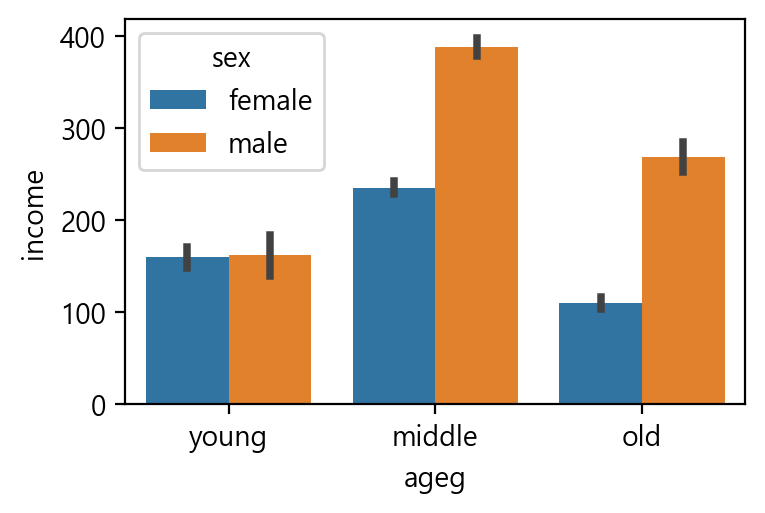

In [87]:
# 직접 할 수 있음
sns.barplot(data = welfare, x = 'ageg', y = 'income', hue = 'sex',
            order = ['young', 'middle', 'old']);

### 나이 및 성별 월급 차이 분석하기

In [88]:
## 나이 및 성별 월급 평균표 만들기

# income 결측치 제거
# age 및 sex별 분리
# income 평균 구하기
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,23.0,male,162.00
1,24.0,female,87.67
2,24.0,male,155.00
3,25.0,female,124.00
4,25.0,male,186.00


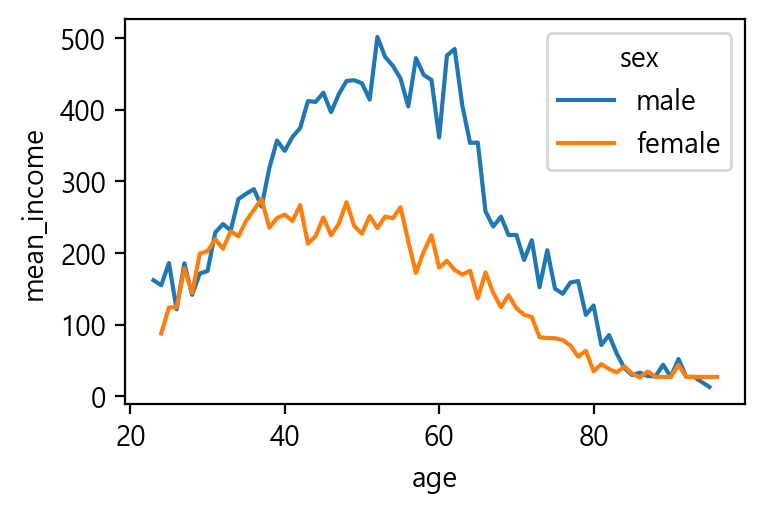

In [89]:
# 선 그래프 만들기
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex');

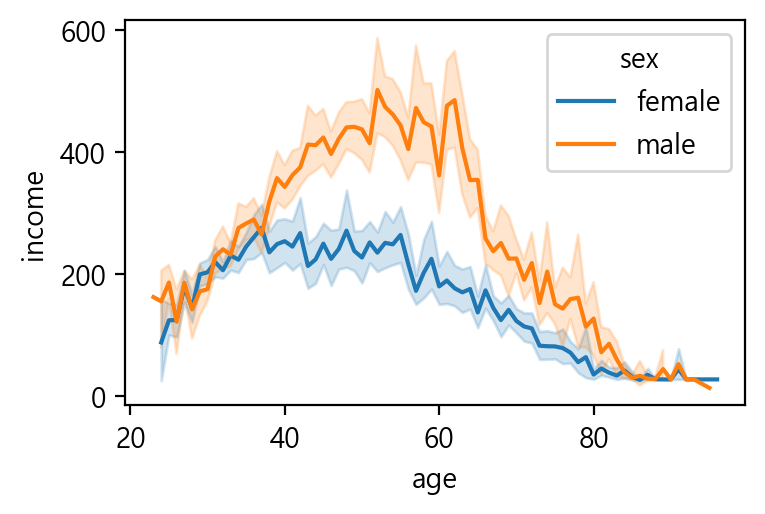

In [90]:
# 선 그래프 만들기
sns.lineplot(data = welfare, x = 'age', y = 'income', hue = 'sex');

## 09-6 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

### 직업 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [91]:
welfare['code_job'].dtypes  # 변수 타입 출력

dtype('float64')

In [92]:
welfare['code_job'].value_counts()  # 빈도 구하기

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

#### 2. 전처리하기

In [93]:
list_job = pd.read_excel('data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [94]:
list_job.shape  # 행, 열 개수 출력

(156, 2)

In [95]:
# welfare에 list_job 결합하기,merge
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [96]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


### 직업별 월급 차이 분석하기

#### 1. 직업별 월급 평균표 만들기

In [97]:
## 직업별 월급 평균표 만들기

# job, income 결측치 제거
# job별 분리
# income 평균 구하기
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.46
1,간호사,265.22
2,감정∙기술영업및중개관련종사자,391.00
3,건물 관리원 및 검표원,168.38
4,건설 및 광업 단순 종사자,261.98


#### 3. 그래프 만들기

**(1) 월급이 많은 직업**

In [98]:
# 상위 10위 추출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.00
60,법률 전문가,776.33
140,행정 및 경영 지원 관리자,771.83
63,보험 및 금융 관리자,734.75
110,재활용 처리 및 소각로 조작원,688.00
131,컴퓨터 하드웨어 및 통신공학 전문가,679.44
24,기계∙로봇공학 기술자 및 시험원,669.17
6,건설∙전기 및 생산 관련 관리자,603.08
120,제관원 및 판금원,597.00
100,의회 의원∙고위 공무원 및 공공단체 임원,580.50


In [160]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

In [164]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [8,6]})  

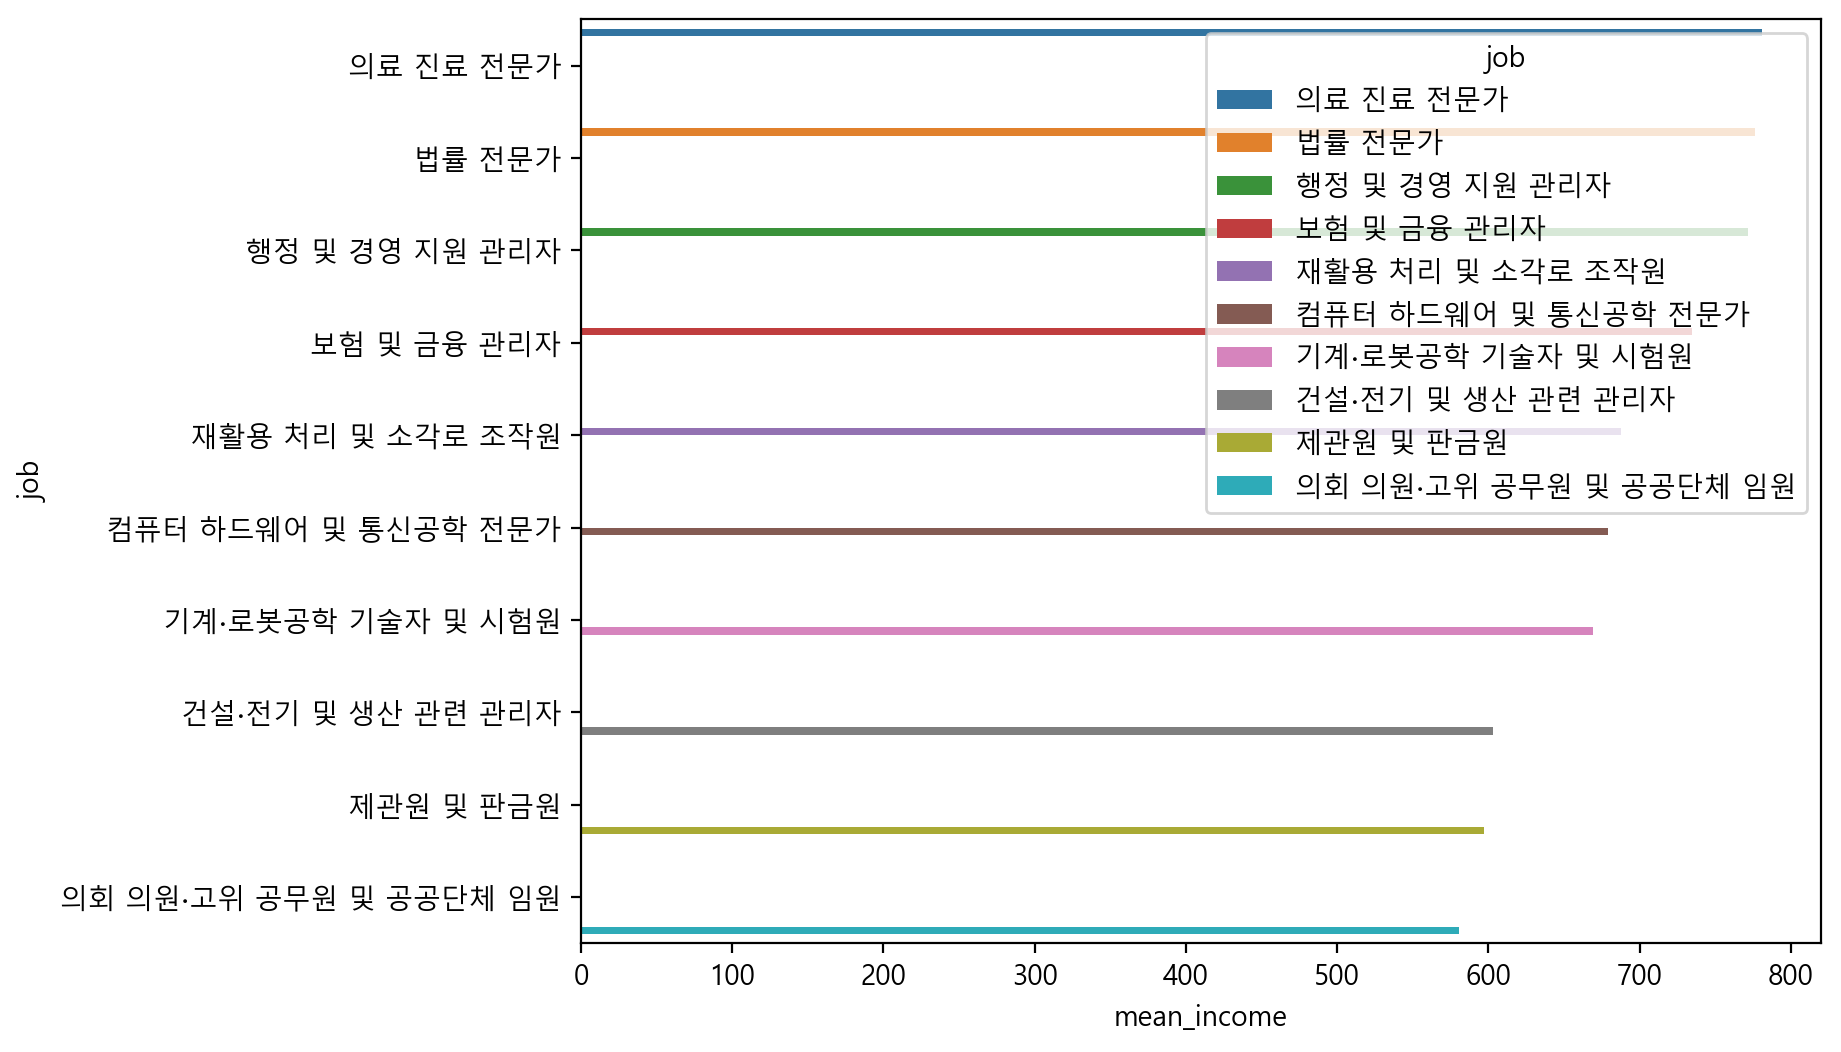

In [165]:
# 막대 그래프 만들기
sns.barplot(data = top10, y = 'job', x = 'mean_income', hue = 'job');

**(2) 월급이 적은 직업**

In [101]:
# 하위 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.96
34,기타 서비스 관련 단순 종사자,77.79
128,청소원 및 환경미화원,88.46
0,가사 및 육아 도우미,92.46
43,돌봄 및 보건 서비스 종사자,117.16
97,음식 관련 단순 종사자,118.19
39,농림∙어업 관련 단순 종사자,122.62
139,학예사∙사서 및 기록물 관리사,140.00
126,채굴 및 토목 관련 기능 종사자,140.00
135,판매 관련 단순 종사자,140.91


In [177]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [8,6]})  

[(0.0, 800.0)]

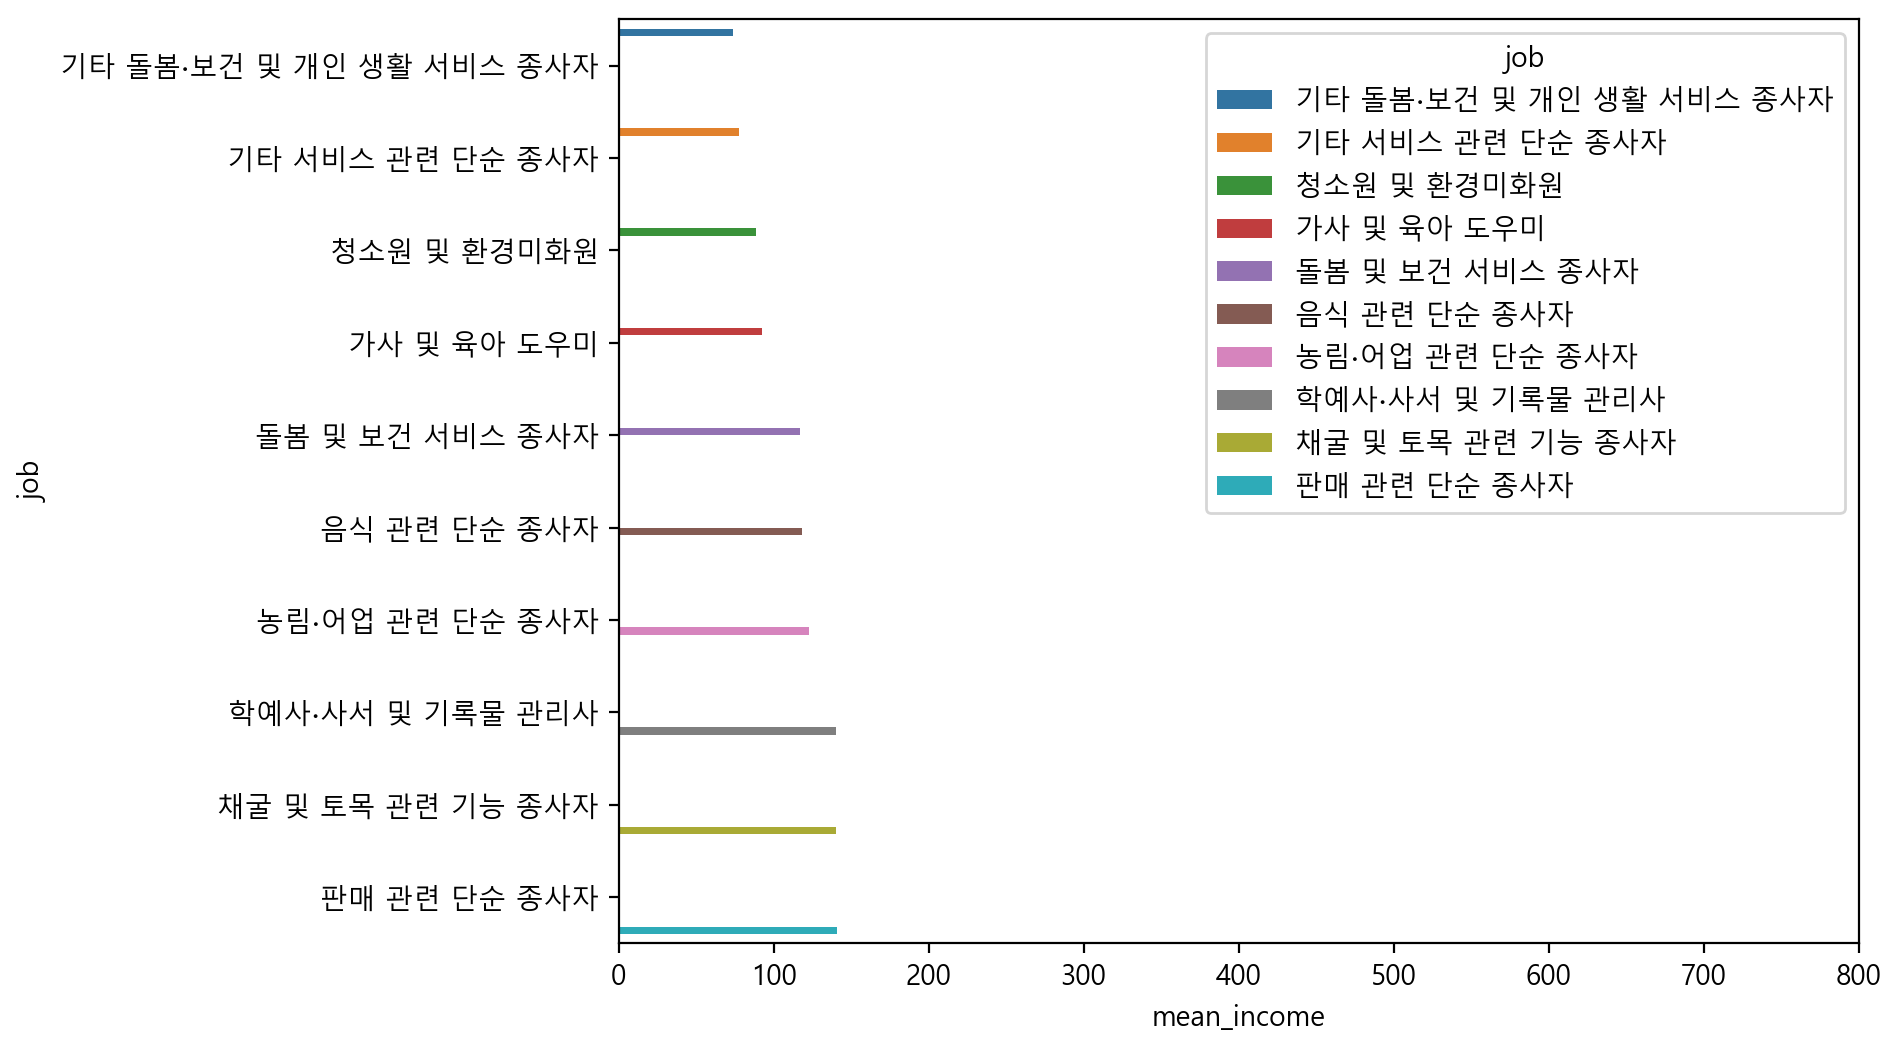

In [178]:
# 막대 그래프 만들기
sns.barplot(data = bottom10, y = 'job', x = 'mean_income', hue = 'job') \
      .set(xlim = [0, 800])

## 09-7 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?

### 성별 직업 빈도 분석하기

#### 1. 성별 직업 빈도표 만들기

In [103]:
## 남성 직업 빈도 상위 10개 추출
#기말시험

# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [104]:
## 여성 직업 빈도 상위 10개 추출

# job 결측치 제거
# female 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


#### 2. 그래프 만들기

[(0.0, 500.0)]

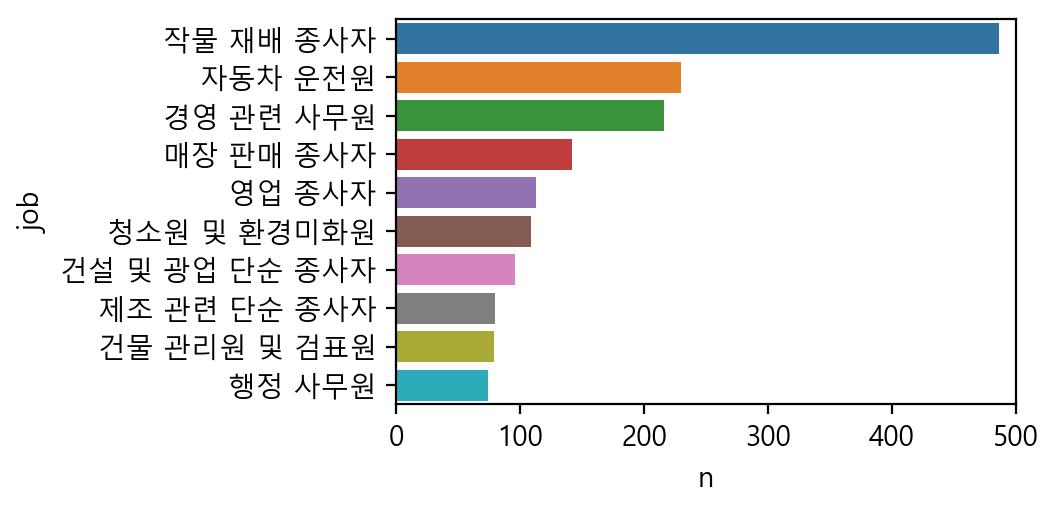

In [105]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

[(0.0, 500.0)]

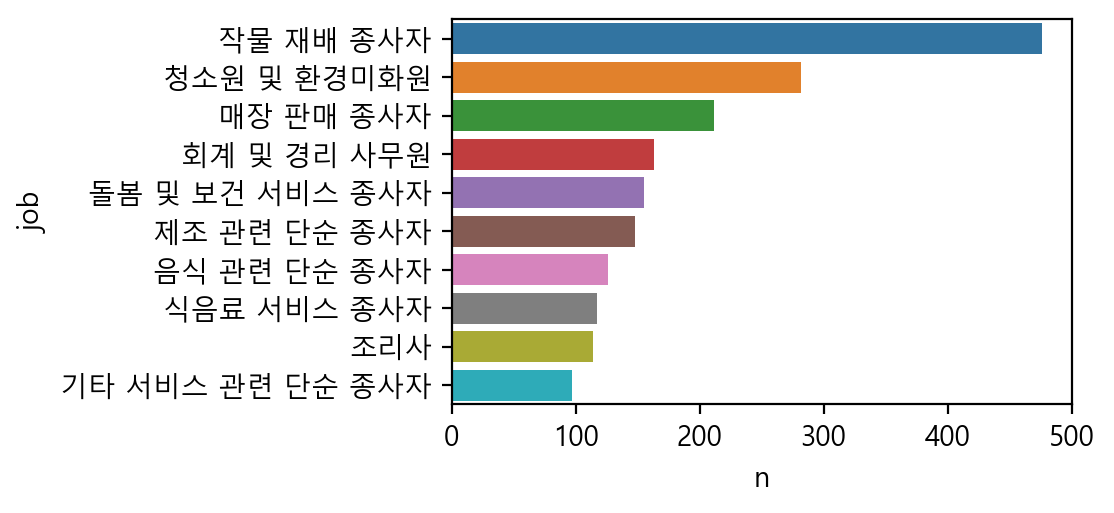

In [106]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = [0, 500])

## 09-8 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

### 종교 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [107]:
welfare['religion'].dtypes  # 변수 타입 출력

dtype('float64')

In [108]:
welfare['religion'].value_counts()  # 빈도 구하기

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

#### 2. 전처리하기

In [109]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

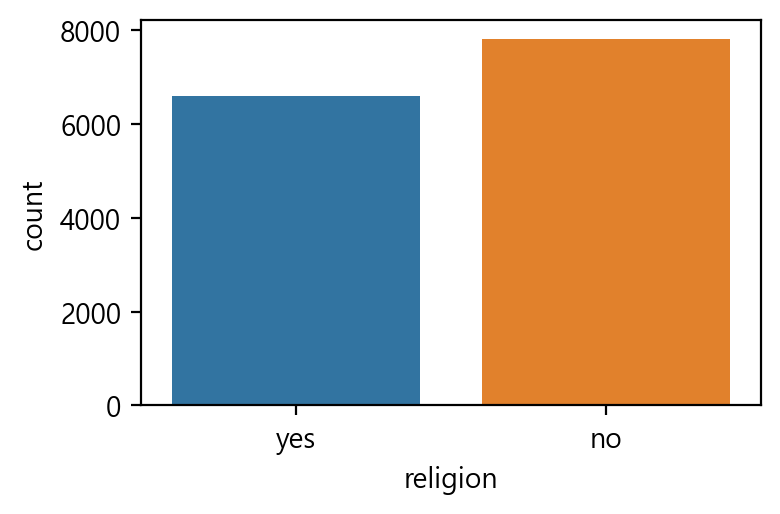

In [110]:
# 막대 그래프 만들기
sns.countplot(data = welfare, x = 'religion')

### 혼인 상태 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [111]:
welfare['marriage_type'].dtypes  # 변수 타입 출력

dtype('float64')

In [112]:
welfare['marriage_type'].value_counts()  # 빈도 구하기

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

#### 2. 파생변수 만들기 - 이혼 여부

In [113]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [114]:
## 이혼 여부별 빈도

# marriage별 분리
# marriage별 빈도 구하기
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

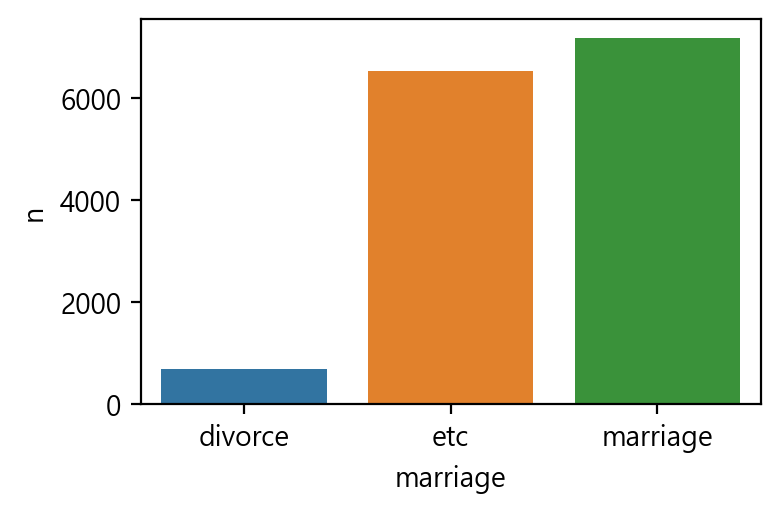

In [115]:
# 막대 그래프 만들기
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

### 종교 유무에 따른 이혼율 분석하기

#### 1. 종교 유무에 따른 이혼율표 만들기

In [116]:
# etc 제외
# religion별 분리
# marriage 추출
# 비율 구하기
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.91
1,no,divorce,0.09
2,yes,marriage,0.92
3,yes,divorce,0.08


#### 2. 그래프 만들기

In [117]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

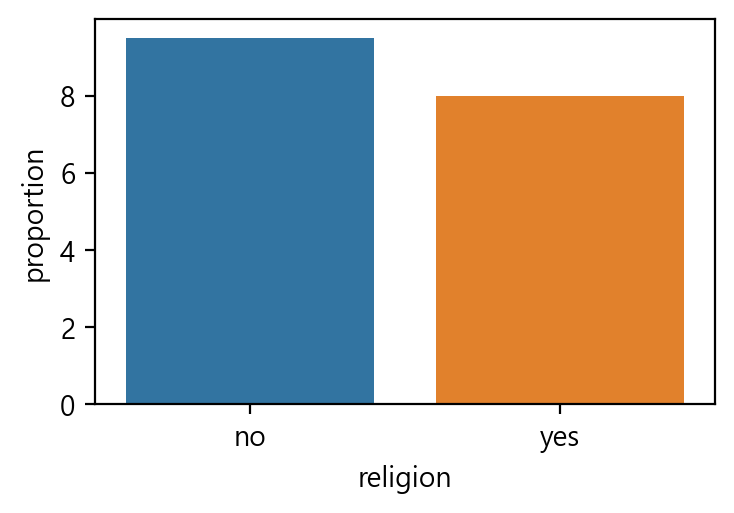

In [118]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석하기

#### 1. 연령대별 이혼율표 만들기

In [119]:
# etc 제외
# ageg별 분리
# marriage 추출
# 비율 구하기
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.92
1,middle,divorce,0.08
2,old,marriage,0.91
3,old,divorce,0.09
4,young,marriage,1.00


In [120]:
## 연령대 및 이혼 여부별 빈도

# etc 제외
# ageg별 분리
# marriage 추출
# 빈도 구하기
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index = False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,3031
1,middle,divorce,268
2,old,marriage,4150
3,old,divorce,421
4,young,marriage,9


#### 2. 연령대별 이혼율 그래프 만들기

In [121]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,8.1
3,old,divorce,9.2


<Axes: xlabel='ageg', ylabel='proportion'>

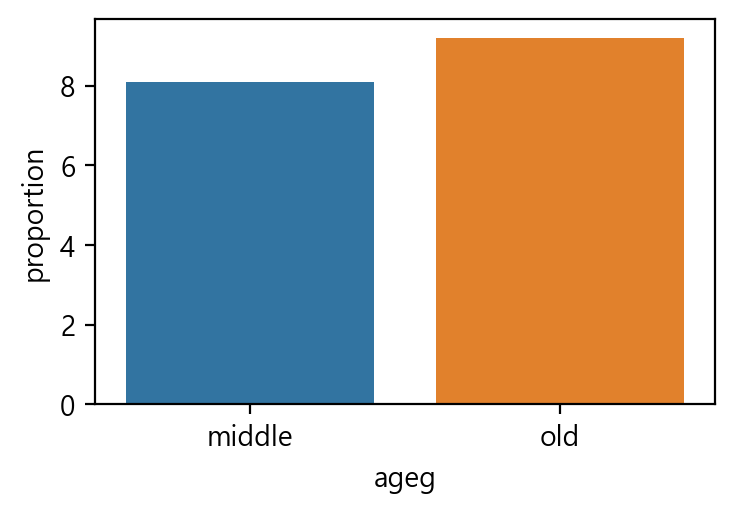

In [122]:
# 막대 그래프 만들기
sns.barplot(data = age_div, x = 'ageg', y = 'proportion')

#### 3. 연령대 및 종교 유무에 따른 이혼율표 만들기

In [123]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)

age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.91
1,middle,no,divorce,0.09
2,middle,yes,marriage,0.93
3,middle,yes,divorce,0.07
4,old,no,marriage,0.90
5,old,no,divorce,0.10
6,old,yes,marriage,0.92
7,old,yes,divorce,0.08


#### 4. 연령대 및 종교 유무에 따른 이혼율 그래프 만들기

In [124]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)

age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,8.7
3,middle,yes,divorce,7.3
5,old,no,divorce,10.3
7,old,yes,divorce,8.3


<Axes: xlabel='ageg', ylabel='proportion'>

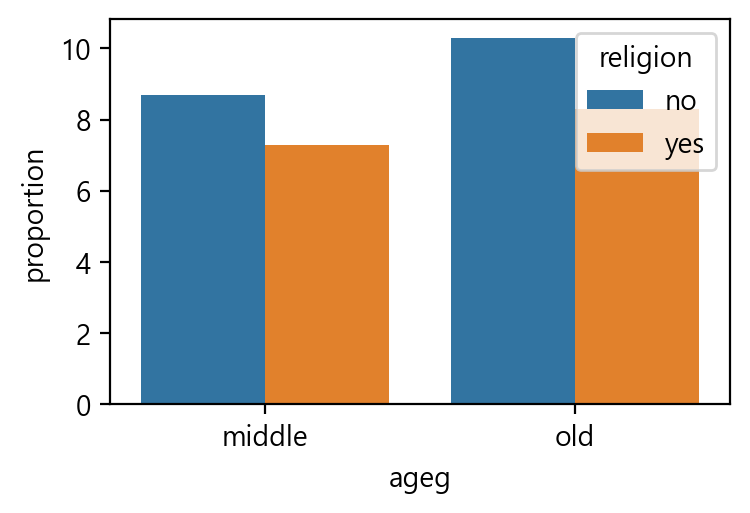

In [125]:
# 막대 그래프 만들기
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

## 09-9 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

### 지역 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [126]:
welfare['code_region'].dtypes  # 변수 타입 출력

dtype('float64')

In [127]:
welfare['code_region'].value_counts()  # 빈도 구하기

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

#### 2. 전처리하기


In [128]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [129]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


### 지역별 연령대 비율 분석하기

#### 1. 지역별 연령대 비율표 만들기

In [130]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.51
1,강원/충북,middle,0.29
2,강원/충북,young,0.20
3,광주/전남/전북/제주도,old,0.49
4,광주/전남/전북/제주도,middle,0.31
5,광주/전남/전북/제주도,young,0.20
6,대구/경북,old,0.55
7,대구/경북,middle,0.28
8,대구/경북,young,0.17
9,대전/충남,old,0.45


#### 2. 그래프 만들기

In [131]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,50.9
1,강원/충북,middle,28.8
2,강원/충북,young,20.2
3,광주/전남/전북/제주도,old,49.2
4,광주/전남/전북/제주도,middle,30.7
5,광주/전남/전북/제주도,young,20.0
6,대구/경북,old,55.3
7,대구/경북,middle,28.1
8,대구/경북,young,16.7
9,대전/충남,old,45.4


<Axes: xlabel='proportion', ylabel='region'>

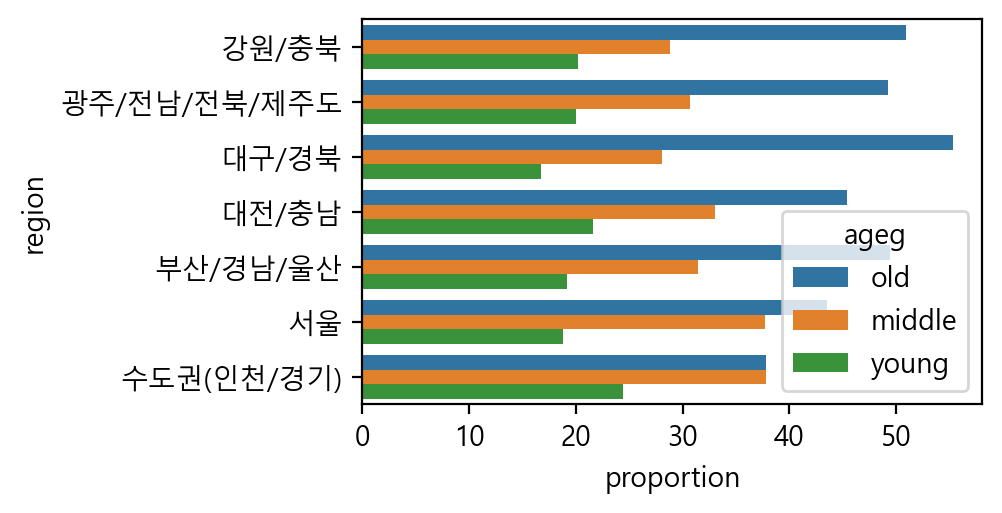

In [132]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

#### 3. 누적 비율 막대 그래프 만들기

**(1) 피벗하기**

In [133]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,28.8,50.9,20.2
광주/전남/전북/제주도,30.7,49.2,20.0
대구/경북,28.1,55.3,16.7
대전/충남,33.0,45.4,21.6
부산/경남/울산,31.4,49.4,19.2
서울,37.7,43.5,18.8
수도권(인천/경기),37.8,37.8,24.4


**(2) 그래프 만들기**

<Axes: ylabel='region'>

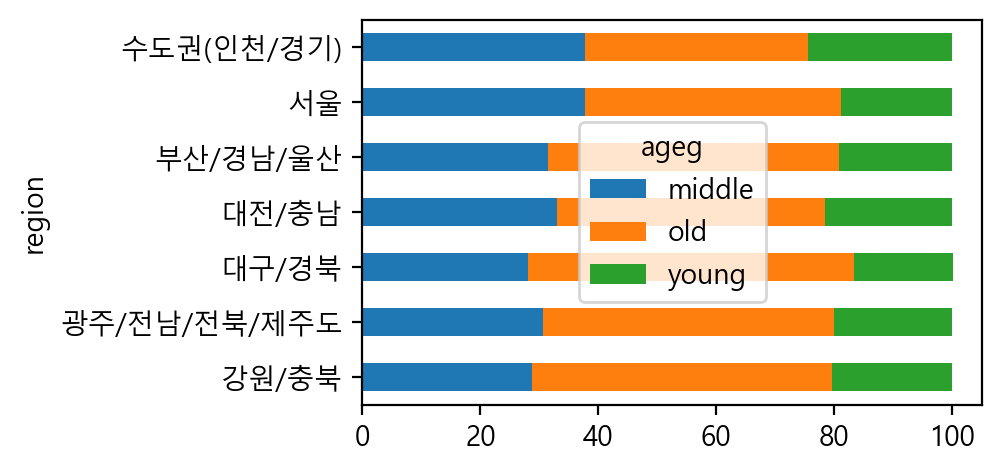

In [134]:
# 가로 막대 그래프 만들기
pivot_df.plot.barh(stacked = True)

**(3) 막대 정렬하기**

In [135]:
# 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),24.4,37.8,37.8
서울,18.8,37.7,43.5
대전/충남,21.6,33.0,45.4
광주/전남/전북/제주도,20.0,30.7,49.2
부산/경남/울산,19.2,31.4,49.4
강원/충북,20.2,28.8,50.9
대구/경북,16.7,28.1,55.3


<Axes: ylabel='region'>

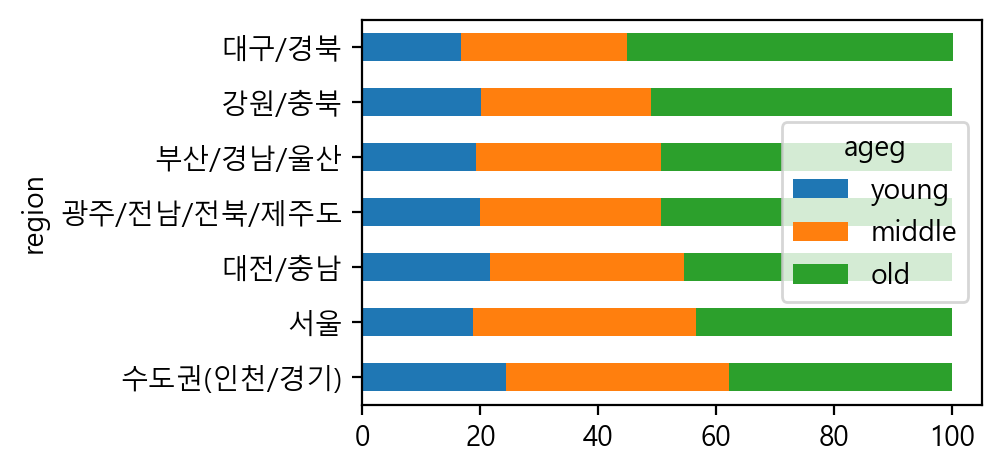

In [136]:
# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked = True)